## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [100]:
customers=pd.read_csv('Ecommerce_Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [101]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [102]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [103]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis


___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.**

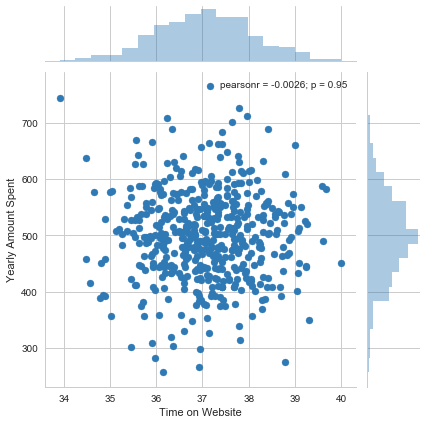

In [104]:
sns.set_palette("RdBu_r")
sns.set_style('whitegrid')

sns.jointplot(customers['Time on Website'],customers['Yearly Amount Spent'],kind='scatter')


**Use seaborn to create a jointplot to compare the Time on App and Yearly Amount Spent columns.**

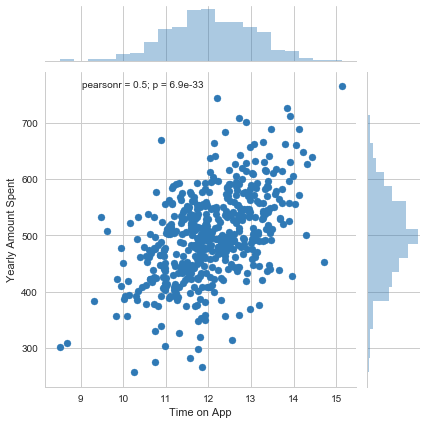

In [124]:
sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'],kind='scatter')

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

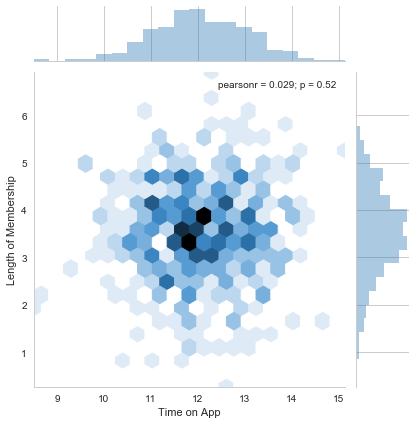

In [106]:

sns.jointplot(customers['Time on App'],customers['Length of Membership'],kind='hex')


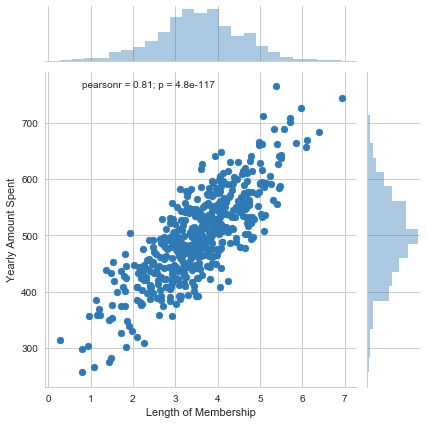

In [133]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

**From the above chart, we can see that there is a strong correlation between 'Length of Membership'and 'Yearly Amount Spent'**

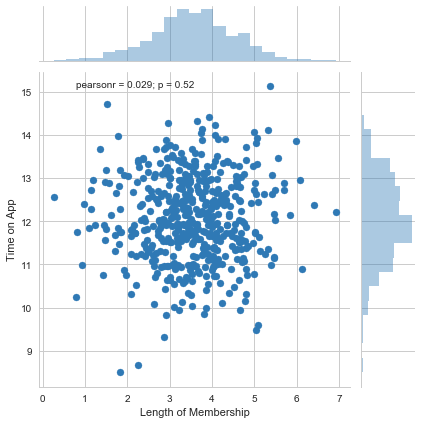

In [134]:
sns.jointplot(x='Length of Membership',y='Time on App',data=customers)

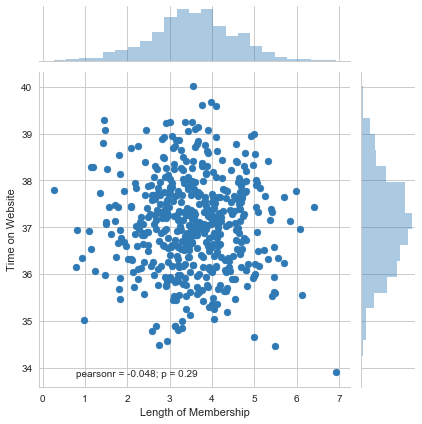

In [137]:
sns.jointplot(x='Length of Membership',y='Time on Website',data=customers)

**Length of membership and the time on app or website is not correlated**

**Now let's explore these types of relationships across the entire data set using pairplot**

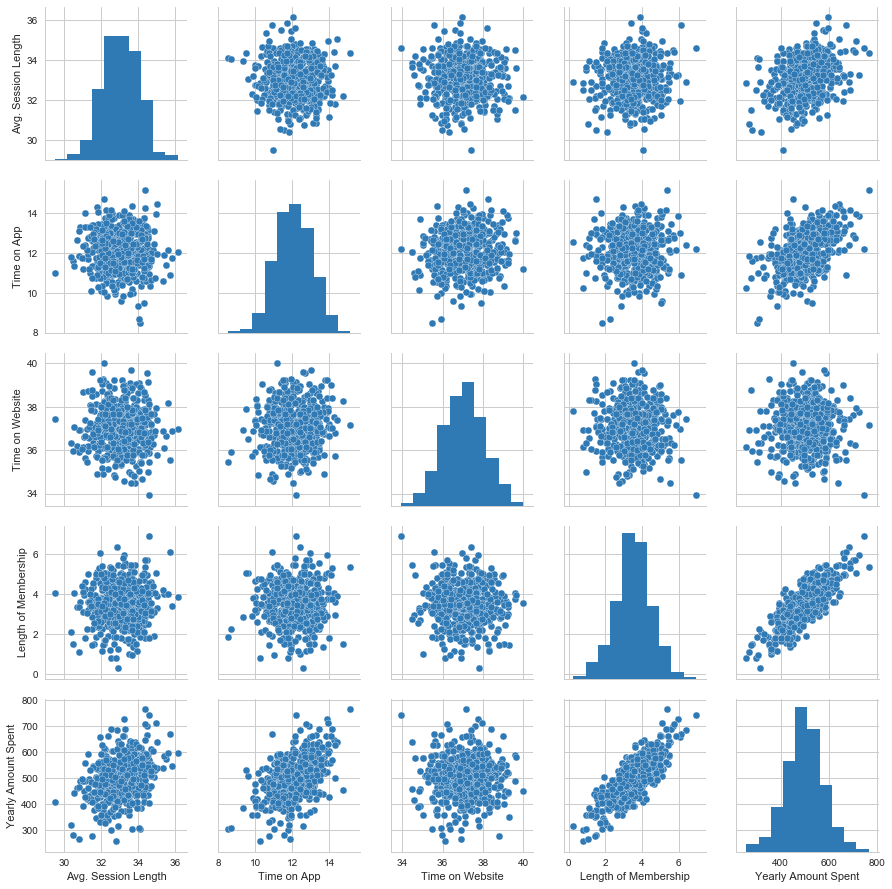

In [125]:
sns.pairplot(customers)


**Based off this plot "Length of Membership" looks to be the most correlated feature with "Yearly Amount Spent."**

**Create a linear model plot of  Yearly Amount Spent vs. Length of Membership. **

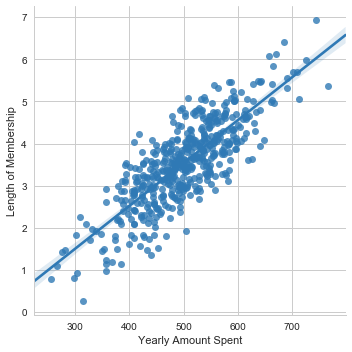

In [109]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=customers)

## Training and Testing Data

**Let's split the data into training and testing sets.**


In [110]:
X=customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [111]:
y=customers['Yearly Amount Spent']

** Import model_selection.train_test_split from sklearn to split the data into training and testing sets.**

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [114]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [115]:
lm=LinearRegression()

** Train/fit lm on the training data.**

In [116]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [131]:
print('Coefficients are: ',lm.coef_)

Coefficients are:  [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [132]:
y_pred=lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

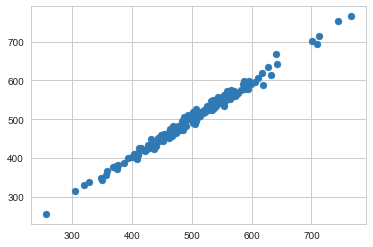

In [119]:
plt.scatter(y_test,y_pred)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. **

In [128]:
from sklearn import metrics

In [129]:
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))



MAE:  7.22814865343082
MSE:  79.81305165097419
RMSE:  8.93381506697862


## Residuals

**Plot a histogram of the residuals and make sure it looks normally distributed. **

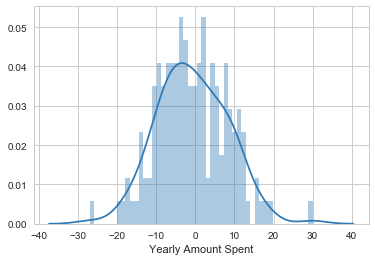

In [130]:
sns.distplot((y_test-y_pred),bins=50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [141]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** Interpreting the coefficients **

**Interpreting the coefficients:**
Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

**Do you think the company should focus more on their mobile app or on their website?**
It is abundantly clear that currently,the mobile app is working way better than the website.Thus,from the offset it appears that the company needs to spend more time on developing the app than the website.Though we need to check the increase in dollar amount spent for the additional time spent on developing app VS the additional time spent in developing the website.
Thus,we need to do the cost benefit analysis,and focus on the feature which maximizes the overall amount spent. 